In [1]:
import numpy as np
import pandas as pd
#Regular Expression
import re

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
boat_df = pd.read_csv('BoatProduct.csv')
boat = boat_df.copy()
boat.head(10)

,ProductName,ProductPrice,Discount,NumberofReviews,Rate,Review,Summary
0,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Fantastic product,Very good product in this price range..
1,Stone 1000v2,"Sale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Outstanding,Outstanding Product
2,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Awesome,Works like a charm. Good sound quality. Visual...
3,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Boat stone 1000 v2,Great
4,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,Quality sound,Amazing sound quality.totally premium.&.afford...
5,Stone 1000v2,"\nSale price₹ 3,999",43% off,7 reviews,★\n 5.0\n,NaN,boAt Stone 1000v2
6,Stone Grenade,"\nSale price₹ 1,499",62% off,92 reviews,★\n 4.9\n,NaN,Nice product
7,Stone Grenade,"\nSale price₹ 1,499",62% off,92 reviews,★\n 4.9\n,NaN,boAt Stone Grenade | Bluetooth Speakers with 1...
8,Stone Grenade,"\nSale price₹ 1,499",62% off,92 reviews,★\n 4.9\n,Very nice quality and where is amazing flight ...,Very nice quality and where is amazing flight ...
9,Stone Grenade,"\nSale price₹ 1,499",62% off,92 reviews,★\n 4.9\n,Best quality,Sound like a good


In [4]:
# Information about the dataset
boat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ProductName      1449 non-null   object
 1   ProductPrice     1448 non-null   object
 2   Discount         1448 non-null   object
 3   NumberofReviews  1448 non-null   object
 4   Rate             1448 non-null   object
 5   Review           874 non-null    object
 6   Summary          1448 non-null   object
dtypes: object(7)
memory usage: 79.4+ KB


## Data Cleaning

In [5]:
# Cleaning Price Column
new = boat["ProductPrice"].str.split(" ", n = 1, expand = True)
boat["Price"]= new[1]
boat['Price']=boat['Price'].str.replace('price₹', '')
boat['Price']=boat['Price'].str.replace(',', '').astype('float64')

In [6]:
# Cleaning Discount Column
new = boat["Discount"].str.split(" ", n = 1, expand = True)
boat["Disc"]= new[0]

In [7]:
# Cleaning no of reviews column
new = boat["NumberofReviews"].str.split(" ", n = 1, expand = True)
boat["Review"]= new[0]
boat['Review']=boat['Review'].astype('category')
boat['Review']=pd.to_numeric(boat['Review'],errors='coerce')

In [8]:
# Cleaning Rate column
new = boat["Rate"].str.split(" ", n = 1, expand = True)
boat["Rate"]= new[1]
boat["Rate"]=boat["Rate"].astype('float64')

In [9]:
# Dropping duplicate columns
boat.drop(["ProductPrice","Discount","NumberofReviews"],axis=1,inplace=True)
boat.head()

,ProductName,Rate,Review,Summary,Price,Disc
0,Stone 1000v2,5.0,7.0,Very good product in this price range..,3999.0,43%
1,Stone 1000v2,5.0,7.0,Outstanding Product,3999.0,43%
2,Stone 1000v2,5.0,7.0,Works like a charm. Good sound quality. Visual...,3999.0,43%
3,Stone 1000v2,5.0,7.0,Great,3999.0,43%
4,Stone 1000v2,5.0,7.0,Amazing sound quality.totally premium.&.afford...,3999.0,43%


In [10]:
# Checking info of dataset
boat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductName  1449 non-null   object 
 1   Rate         1438 non-null   float64
 2   Review       1438 non-null   float64
 3   Summary      1448 non-null   object 
 4   Price        1438 non-null   float64
 5   Disc         1448 non-null   object 
dtypes: float64(3), object(3)
memory usage: 68.0+ KB


In [11]:
# Checking null values
boat.isnull().sum()

ProductName     0
Rate           11
Review         11
Summary         1
Price          11
Disc            1
dtype: int64

In [12]:
# Filling null values
for i in list(boat.columns):
  boat[i].fillna(boat[i].mode()[0],inplace=True)

## Exploratory Data Analysis

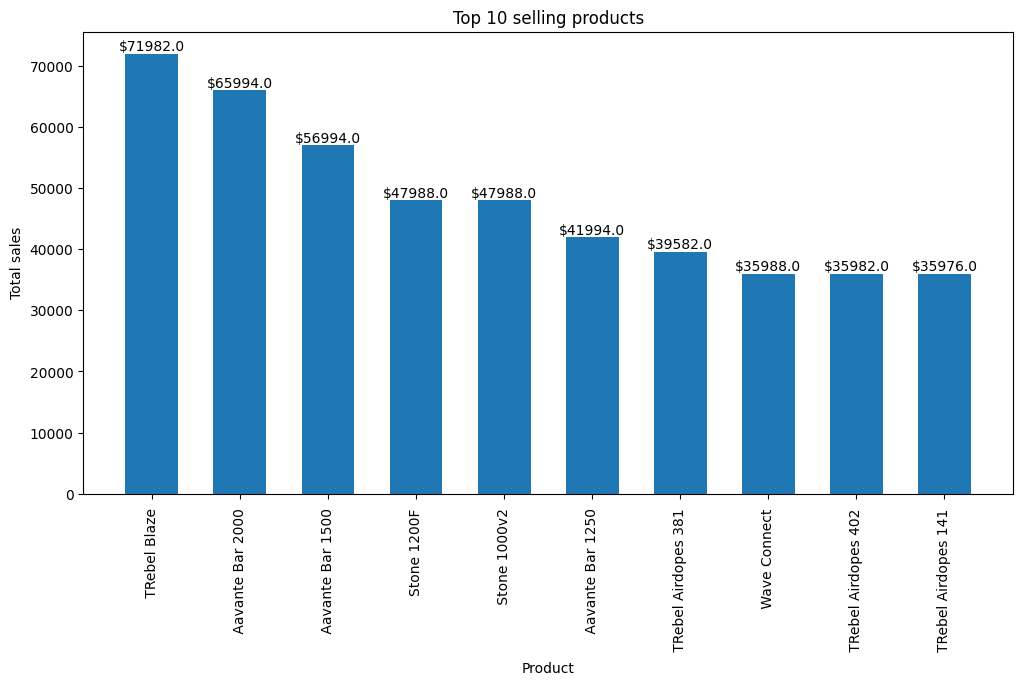

In [32]:
top_10 = boat.groupby('ProductName')['Price'].sum().sort_values(ascending=False)[:10]

# create a color map based on the total sales for each product
# cmap = sns.color_palette("Blues", len(top_10))

# create a bar plot of the top 20 selling products
plt.figure(figsize=(12, 6))
plt.bar(x=top_10.index, height=top_10.values, width=0.6)
plt.xticks(rotation=90, ha='center')
plt.xlabel('Product')
plt.ylabel('Total sales')
plt.title('Top 10 selling products')

# add the sum of price for each product at the top of each bar
for i, val in enumerate(top_10.values):
    plt.text(i, val+500, f"${val}", horizontalalignment='center')

plt.show()

## Text Preprocessing- NLP

In [33]:
#libraries required for data preprocessing
import string
import spacy
import re
nlp=spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')                                #Multilingual Wordnet Data from OMW with newer Wordnet versions
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS
import spacy
from collections import Counter

nlp=spacy.load("en_core_web_sm")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [34]:
#defining function for preprocessing
def preprocess(text,remove_digits=True):
    text = re.sub('\W+',' ', text)                                        #for replacing non-word characters
    text = re.sub('\s+',' ', text)                                        #for replacng extra spaces
    text = re.sub("(?<!\w)\d+", "", text)                                 # Remove all numbers except those attached to a word
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)                           # Remove all hyphens except between two words
    text=text.lower()
    nopunc=[char for char in text if char not in string.punctuation]      #for removing punctuation in the strings
    nopunc=''.join(nopunc)
    
    
    return [word for word in nopunc.split() if word.lower() not in STOP_WORDS] #for removing stop words  # Defining a function for lemitization

In [35]:
 # Defining a function for lemitization
def lemmatize_verbs(words):
   
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas
def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

In [36]:
#converting them into string
def listtostring(s):
  str1=' '
  return (str1.join(s))

In [37]:
def clean_text(input):
  word=preprocess(input)
  lemmas=lemmatize(word)
  return listtostring(lemmas)

In [38]:
# Changing data type of Summary column
boat['Summary']=boat['Summary'].astype('category')

In [39]:
# Applied function to clean the txt column
boat['Clean']=boat['Summary'].apply(clean_text)

In [40]:
boat['Disc']=boat['Disc'].astype('category')

In [41]:
boat.head()

,ProductName,Rate,Review,Summary,Price,Disc,Clean
0,Stone 1000v2,5.0,7.0,Very good product in this price range..,3999.0,43%,good product price range
1,Stone 1000v2,5.0,7.0,Outstanding Product,3999.0,43%,outstanding product
2,Stone 1000v2,5.0,7.0,Works like a charm. Good sound quality. Visual...,3999.0,43%,work like charm good sound quality visually at...
3,Stone 1000v2,5.0,7.0,Great,3999.0,43%,great
4,Stone 1000v2,5.0,7.0,Amazing sound quality.totally premium.&.afford...,3999.0,43%,amaze sound quality totally premium affordable


## Sentiment Analysis

In [42]:
 #using textblob for sentimen analysis
from textblob import TextBlob
#function to calculate polarity
def getPolarity(review):
  return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score <= 0:
        return 'Negative'
    elif score >=0.6:
        return 'Positive'
    else:
        return 'Neutral'

In [43]:
 #on basis of polarity of words labeling is done
boat['Polarity'] = boat['Clean'].apply(getPolarity) 
boat['Analysis'] = boat['Polarity'].apply(analysis)
boat.head()

,ProductName,Rate,Review,Summary,Price,Disc,Clean,Polarity,Analysis
0,Stone 1000v2,5.0,7.0,Very good product in this price range..,3999.0,43%,good product price range,0.700000,Positive
1,Stone 1000v2,5.0,7.0,Outstanding Product,3999.0,43%,outstanding product,0.500000,Neutral
2,Stone 1000v2,5.0,7.0,Works like a charm. Good sound quality. Visual...,3999.0,43%,work like charm good sound quality visually at...,0.633333,Positive
3,Stone 1000v2,5.0,7.0,Great,3999.0,43%,great,0.800000,Positive
4,Stone 1000v2,5.0,7.0,Amazing sound quality.totally premium.&.afford...,3999.0,43%,amaze sound quality totally premium affordable,0.200000,Neutral


## Modeling
## ML Algorithm - Classification

In [44]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier

# Model Building
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold,train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score
from sklearn.pipeline import Pipeline

# Time
from time import time

In [45]:
x=boat['Clean']
y=boat['Analysis']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [46]:
# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by Logistic regression

def model_ovr_lr_tf(x_train, x_test, y_train, y_test):
    global acc_lr_tf,f1_lr_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the four classes using a one vs. rest strategy with Logistic Regression
    
    lr = LogisticRegression()
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()

    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_lr_tf=accuracy_score(y_test,y_pred)
    f1_lr_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time :',time()-t0)
    print('Accuracy: ',acc_lr_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_lr_tf

# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by MultinomialNB

def model_ovr_nb_tf(x_train, x_test, y_train, y_test):
    global acc_nb_tf,f1_nb_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the three classes using a one vs. rest strategy with MultinomialNB
    
    lr = MultinomialNB()
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_nb_tf=accuracy_score(y_test,y_pred)
    f1_nb_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_nb_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_nb_tf

# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by Decision Tree
def model_ovr_dt_tf(x_train, x_test, y_train, y_test):
    global acc_dt_tf,f1_dt_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the three classes using a one vs. rest strategy with Decision Tree Classifier
    
    lr = DecisionTreeClassifier(random_state=1)
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_dt_tf=accuracy_score(y_test,y_pred)
    f1_dt_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_dt_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_dt_tf

# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by KNN

def model_ovr_knn_tf(x_train, x_test, y_train, y_test):
    global acc_knn_tf,f1_knn_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the four classes using a one vs. rest strategy with knn
    
    lr = KNeighborsClassifier()
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_knn_tf=accuracy_score(y_test,y_pred)
    f1_knn_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_knn_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))

# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by Random Forest

def model_ovr_rf_tf(x_train, x_test, y_train, y_test):
    global acc_rf_tf,f1_rf_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the four classes using a one vs. rest strategy with Random Forest
    
    lr = RandomForestClassifier(random_state=10)
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_rf_tf=accuracy_score(y_test,y_pred)
    f1_rf_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_rf_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))

# Self defining function to convert the data into vector form by tf idf vectorizer and classify and create model by Adaptive Boosting

def model_ovr_ab_tf(x_train, x_test, y_train, y_test):
    global acc_ab_tf,f1_ab_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    
    #Classifing data of the four classes using a one vs. rest strategy with Adaptive Boosting
    
    lr = AdaBoostClassifier(random_state=1)
    ovr = OneVsRestClassifier(lr)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_ab_tf=accuracy_score(y_test,y_pred)
    f1_ab_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_ab_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))

In [47]:
# Evaluating Models

print('********************Logistic Regression*********************')
print('\n')
model_ovr_lr_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Multinomial NB*********************')
print('\n')
model_ovr_nb_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Decision Tree*********************')
print('\n')
model_ovr_dt_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************KNN*********************')
print('\n')
model_ovr_knn_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Random Forest Bagging*********************')
print('\n')
model_ovr_rf_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Adaptive Boosting*********************')
print('\n')
model_ovr_ab_tf(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')

********************Logistic Regression*********************


Time : 0.12563347816467285
Accuracy:  0.8735632183908046
Confusion Matrix: 
 [[112  12   1]
 [ 11 106  16]
 [  1  14 162]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.90      0.90      0.90       125
     Neutral       0.80      0.80      0.80       133
    Positive       0.91      0.92      0.91       177

    accuracy                           0.87       435
   macro avg       0.87      0.87      0.87       435
weighted avg       0.87      0.87      0.87       435





********************Multinomial NB*********************


Time :  0.05595684051513672
Accuracy:  0.7954022988505747
Confusion Matrix: 
 [[ 92  11  22]
 [ 19  82  32]
 [  0   5 172]]
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.83      0.74      0.78       125
     Neutral       0.84      0.62      0.71       133
    Positive       0.76      0.97 

In [48]:
# Creating tabular format for better comparison
tbl=pd.DataFrame()
tbl['Model']=pd.Series(['Logistic Regreesion','Multinomial NB','Decision Tree','KNN','Random Forest','Adaptive Boosting'])
tbl['Accuracy']=pd.Series([acc_lr_tf,acc_nb_tf,acc_dt_tf,acc_knn_tf,acc_rf_tf,acc_ab_tf])
tbl['F1_Score']=pd.Series([f1_lr_tf,f1_nb_tf,f1_dt_tf,f1_knn_tf,f1_rf_tf,f1_ab_tf])
tbl.set_index('Model')

,Accuracy,F1_Score
Model,,
Logistic Regreesion,0.873563,0.873425
Multinomial NB,0.795402,0.788434
Decision Tree,0.921839,0.921483
KNN,0.666667,0.653557
Random Forest,0.935632,0.935170
Adaptive Boosting,0.917241,0.916481


In [49]:
# Best model on the basis of F1 Score
tbl.sort_values('F1_Score',ascending=False)

,Model,Accuracy,F1_Score
4,Random Forest,0.935632,0.935170
2,Decision Tree,0.921839,0.921483
5,Adaptive Boosting,0.917241,0.916481
0,Logistic Regreesion,0.873563,0.873425
1,Multinomial NB,0.795402,0.788434
3,KNN,0.666667,0.653557



 OneVsRestClassifier(estimator=LogisticRegression())
f1-Score(train): mean= (0.886), min=(0.850)) ,max= (0.920), stdev= (0.025)
f1-Score(test): 0.8865

 OneVsRestClassifier(estimator=MultinomialNB())
f1-Score(train): mean= (0.801), min=(0.692)) ,max= (0.870), stdev= (0.052)
f1-Score(test): 0.8019

 OneVsRestClassifier(estimator=DecisionTreeClassifier(random_state=1))
f1-Score(train): mean= (0.906), min=(0.878)) ,max= (0.951), stdev= (0.025)
f1-Score(test): 0.9061

 OneVsRestClassifier(estimator=KNeighborsClassifier())
f1-Score(train): mean= (0.605), min=(0.527)) ,max= (0.662), stdev= (0.044)
f1-Score(test): 0.6073

 OneVsRestClassifier(estimator=RandomForestClassifier(random_state=10))
f1-Score(train): mean= (0.923), min=(0.880)) ,max= (0.960), stdev= (0.025)
f1-Score(test): 0.9227

 OneVsRestClassifier(estimator=AdaBoostClassifier())
f1-Score(train): mean= (0.919), min=(0.840)) ,max= (0.951), stdev= (0.035)
f1-Score(test): 0.9195


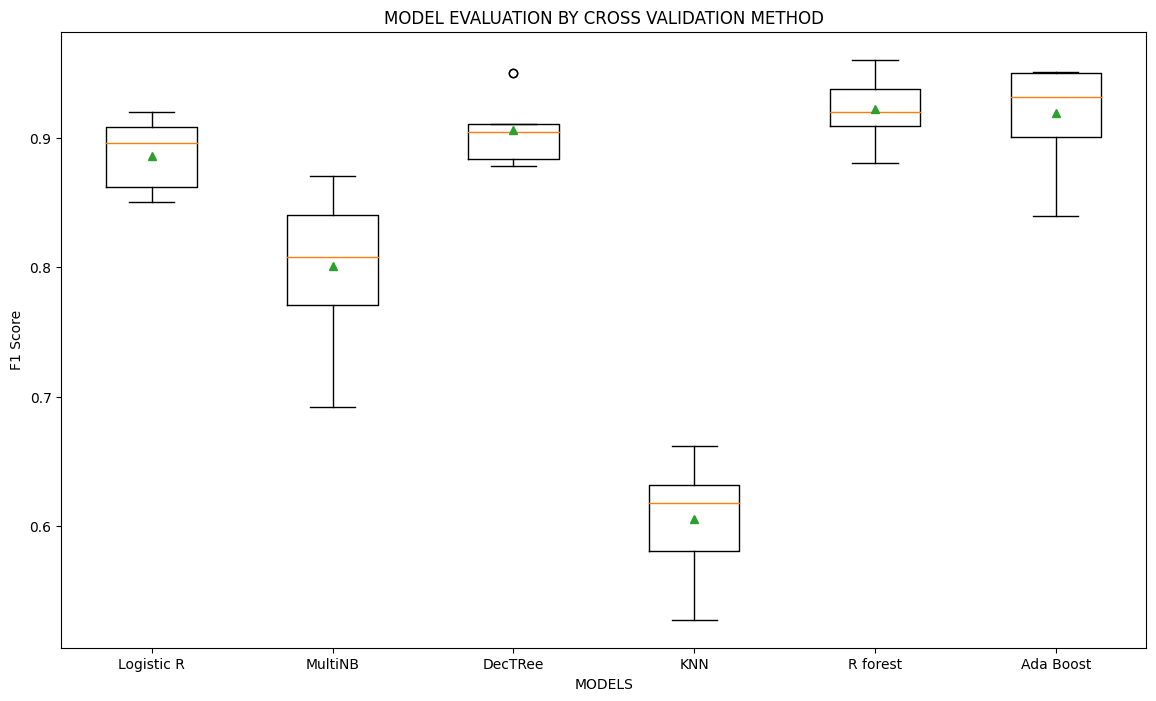

In [51]:
# Using cross validation method to avoid overfitting
import statistics as st
vector = TfidfVectorizer()

x_train_v = vector.fit_transform(x_train)
x_test_v  = vector.transform(x_test)
###############################################################################
# Model building
lr =OneVsRestClassifier(LogisticRegression())
mnb=OneVsRestClassifier(MultinomialNB())
dct=OneVsRestClassifier(DecisionTreeClassifier(random_state=1))
knn=OneVsRestClassifier(KNeighborsClassifier())
rf=OneVsRestClassifier(RandomForestClassifier(random_state=10))
ab=OneVsRestClassifier(AdaBoostClassifier())
m  =[lr,mnb,dct,knn,rf,ab]
model_name=['Logistic R','MultiNB','DecTRee','KNN','R forest','Ada Boost']

results, mean_results, p, f1_test=list(),list(),list(),list()

################################################################################
#Model fitting,cross-validating and evaluating performance

def algor(model):
  print('\n',i)
  pipe=Pipeline([('model',model)])
  pipe.fit(x_train_v,y_train)
  cv=StratifiedKFold(n_splits=10)
  n_scores=cross_val_score(pipe,x_train_v,y_train,scoring='f1_weighted',cv=cv,n_jobs=-1,error_score='raise') # As it is an Imbalance data so f1 score will give a better accuracy than normal accuracy.
  results.append(n_scores)
  mean_results.append(st.mean(n_scores))
  print('f1-Score(train): mean= (%.3f), min=(%.3f)) ,max= (%.3f), stdev= (%.3f)'%(st.mean(n_scores), min(n_scores), max(n_scores),np.std(n_scores)))
  y_pred=cross_val_predict(model,x_train_v,y_train,cv=cv)
  p.append(y_pred)
  f1=f1_score(y_train,y_pred, average = 'weighted')
  f1_test.append(f1)
  print('f1-Score(test): %.4f'%(f1))

for i in m:
  algor(i)

###############################################################################
# Model comparison By Visualizing 

fig=plt.subplots(figsize=(14,8))
plt.title('MODEL EVALUATION BY CROSS VALIDATION METHOD')
plt.xlabel('MODELS')
plt.ylabel('F1 Score')
plt.boxplot(results,labels=model_name,showmeans=True)
plt.show()

In [52]:
 ## Prediction on random data by best model 
######################################
data=["Firstly order ...then watch getting disconnected again and again ... After exchange ..watch is working perfectly now ... Smooth touch .. calling with watch is awesome ... Alexa is working properly .. pretty happy with boat .",
"Best quality ever",
"Sound quality is very poor feeling bad for order"]
data=vector.transform(data)
rf.predict(data)

array(['Neutral', 'Positive', 'Negative'], dtype='<U8')

In [53]:
boat['Disc']=boat['Disc'].astype('object')

In [54]:
for i in range(len(boat)):
  boat['Disc'][i]=re.sub('\D','',boat['Disc'][i])
boat['Discount(%)']=pd.to_numeric(boat['Disc'],errors='coerce')

boat.head()

,ProductName,Rate,Review,Summary,Price,Disc,Clean,Polarity,Analysis,Discount(%)
0,Stone 1000v2,5.0,7.0,Very good product in this price range..,3999.0,43,good product price range,0.700000,Positive,43.0
1,Stone 1000v2,5.0,7.0,Outstanding Product,3999.0,43,outstanding product,0.500000,Neutral,43.0
2,Stone 1000v2,5.0,7.0,Works like a charm. Good sound quality. Visual...,3999.0,43,work like charm good sound quality visually at...,0.633333,Positive,43.0
3,Stone 1000v2,5.0,7.0,Great,3999.0,43,great,0.800000,Positive,43.0
4,Stone 1000v2,5.0,7.0,Amazing sound quality.totally premium.&.afford...,3999.0,43,amaze sound quality totally premium affordable,0.200000,Neutral,43.0


In [55]:
boat.drop('Disc',axis=1,inplace=True)

In [56]:
boat.rename(columns={'Clean':'Clean_Summary',
                     'Rate':'Rating',
                     'Review':'Review_Count'},inplace=True)
boat.head()

,ProductName,Rating,Review_Count,Summary,Price,Clean_Summary,Polarity,Analysis,Discount(%)
0,Stone 1000v2,5.0,7.0,Very good product in this price range..,3999.0,good product price range,0.700000,Positive,43.0
1,Stone 1000v2,5.0,7.0,Outstanding Product,3999.0,outstanding product,0.500000,Neutral,43.0
2,Stone 1000v2,5.0,7.0,Works like a charm. Good sound quality. Visual...,3999.0,work like charm good sound quality visually at...,0.633333,Positive,43.0
3,Stone 1000v2,5.0,7.0,Great,3999.0,great,0.800000,Positive,43.0
4,Stone 1000v2,5.0,7.0,Amazing sound quality.totally premium.&.afford...,3999.0,amaze sound quality totally premium affordable,0.200000,Neutral,43.0


## Product Segmentation - Clustering

In [57]:
# Visualization

import matplotlib.cm as cm
import seaborn as sns
sns.set()

# Clustering 
from sklearn import preprocessing,metrics
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Warnings ignore
import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import silhouette_score

In [58]:
boat.describe()

,Rating,Review_Count,Price,Polarity,Discount(%)
count,1449.000000,1449.000000,1449.000000,1449.000000,1439.000000
mean,4.860041,103.444444,1609.276052,0.419938,58.875608
std,0.116036,197.668059,1291.578413,0.341383,10.519296
min,4.000000,1.000000,199.000000,-1.000000,17.000000
25%,4.800000,9.000000,899.000000,0.000000,51.000000
50%,4.900000,29.000000,1499.000000,0.500000,60.000000
75%,4.900000,92.000000,1899.000000,0.700000,67.000000
max,5.000000,1298.000000,10999.000000,1.000000,83.000000


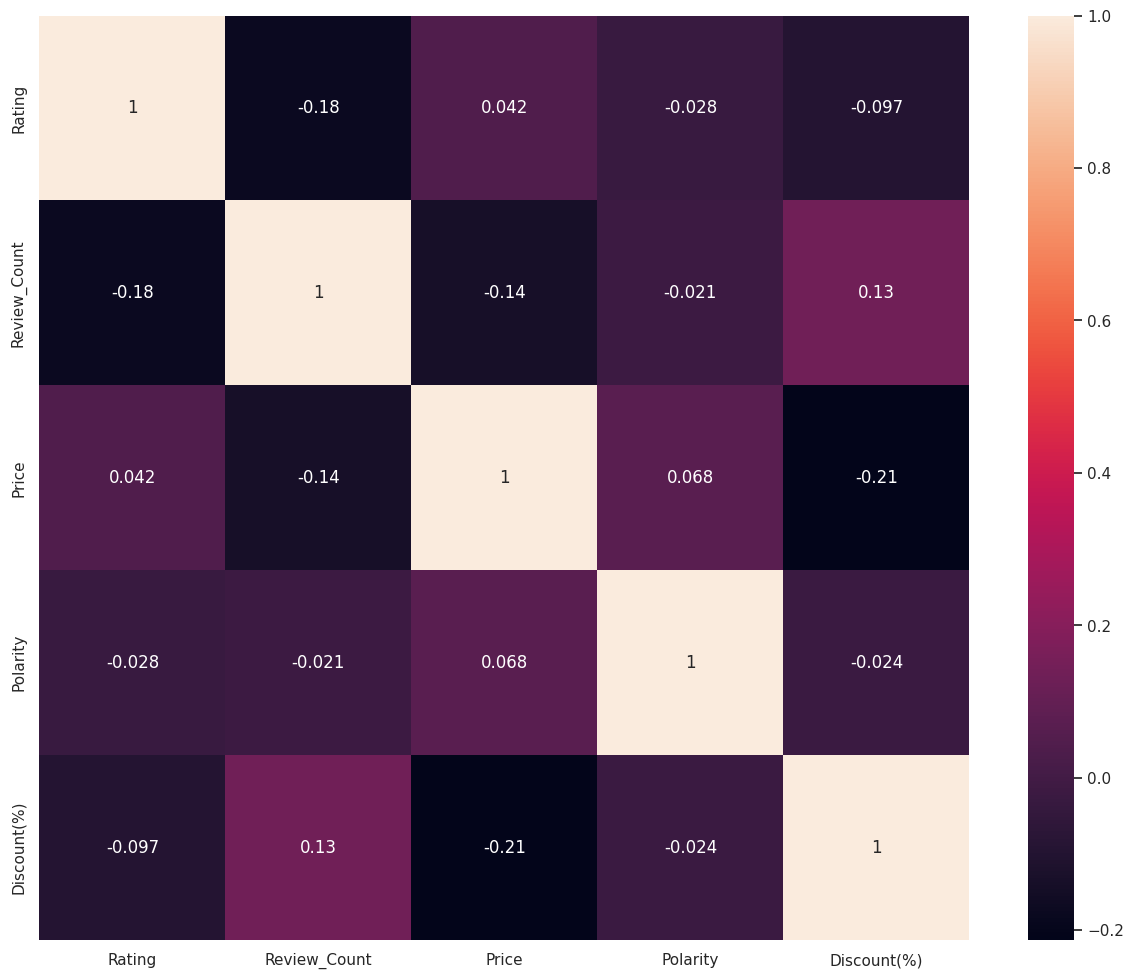

In [59]:
cor=boat.corr()
plt.figure(figsize=(15,12))
sns.heatmap(cor,annot=True)
plt.show()

In [60]:
# Checking Null value
boat.isnull().sum()

ProductName       0
Rating            0
Review_Count      0
Summary           0
Price             0
Clean_Summary     0
Polarity          0
Analysis          0
Discount(%)      10
dtype: int64

In [61]:
# Filling Null value
for i in list(boat.columns):
  boat[i].fillna(boat[i].mode()[0],inplace=True)

In [62]:
# Taking Required Column
X1=boat.loc[:,['Rating','Price','Discount(%)']].values

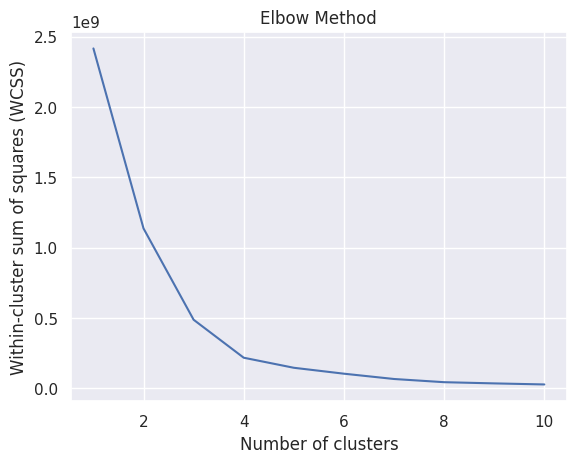

In [63]:
# calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=22)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

# plot the WCSS vs the number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.show()

In [64]:
 #### From the above graph the elbow is bending at 3, so considering the clusters as 3

kmeans_3=KMeans(n_clusters=3,random_state=22)   ### Defining model with cluster as 3
kmeans_3.fit(X1)                                ### Fitting the model 

KMeans(n_clusters=3, random_state=22)

In [65]:
cluster_labels=kmeans_3.fit_predict(X1)          ### To predict the clusters 
boat['K_cluster']=cluster_labels           ### Adding K_cluster column in the dataset which shows cluster labels
boat.head()

,ProductName,Rating,Review_Count,Summary,Price,Clean_Summary,Polarity,Analysis,Discount(%),K_cluster
0,Stone 1000v2,5.0,7.0,Very good product in this price range..,3999.0,good product price range,0.700000,Positive,43.0,2
1,Stone 1000v2,5.0,7.0,Outstanding Product,3999.0,outstanding product,0.500000,Neutral,43.0,2
2,Stone 1000v2,5.0,7.0,Works like a charm. Good sound quality. Visual...,3999.0,work like charm good sound quality visually at...,0.633333,Positive,43.0,2
3,Stone 1000v2,5.0,7.0,Great,3999.0,great,0.800000,Positive,43.0,2
4,Stone 1000v2,5.0,7.0,Amazing sound quality.totally premium.&.afford...,3999.0,amaze sound quality totally premium affordable,0.200000,Neutral,43.0,2


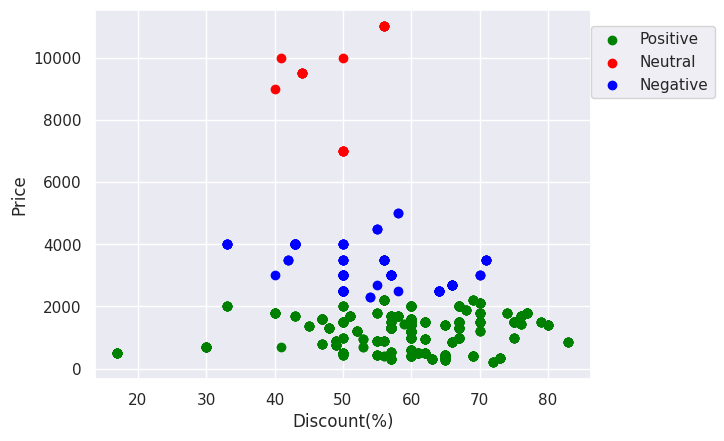

In [66]:
### Plotting 2D graph considering parameters Price and polarity

plt.scatter(X1[cluster_labels==0,2] , X1[cluster_labels==0,1], c='green',label='Positive' )
plt.scatter(X1[cluster_labels==1,2] , X1[cluster_labels==1,1], c='red' ,label='Neutral')
plt.scatter(X1[cluster_labels==2,2] , X1[cluster_labels==2,1], c='blue',label='Negative')


plt.ylabel('Price' )
plt.xlabel('Discount(%)')
plt.legend(loc=(1,.76))
plt.show()

## Hence we can observe from the Clusterization plot and conclude that the products with low prices have a higher chance of making Positive impact on the Market